# Principal Components Analysis

In [41]:
# Sometimes you may need to use the t() function 
pr.out=prcomp(USArrests, scale=TRUE)

# means of the variables used by the PCA
pr.out$center

# standard deviations of the variables used by the PCA
pr.out$scale

# PCA loadings
pr.out$rotation

# Get the first two principal components
#pr.out$x[, 1:2]

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Murder   Assault  UrbanPop      Rape 
 4.355510 83.337661 14.474763  9.366385

,PC1,PC2,PC3,PC4
Murder,-0.5358995,0.4181809,-0.3412327,0.64922780
Assault,-0.5831836,0.1879856,-0.2681484,-0.74340748
UrbanPop,-0.2781909,-0.8728062,-0.3780158,0.13387773
Rape,-0.5434321,-0.1673186,0.8177779,0.08902432


[1] 0.62006039 0.24744129 0.08914080 0.04335752

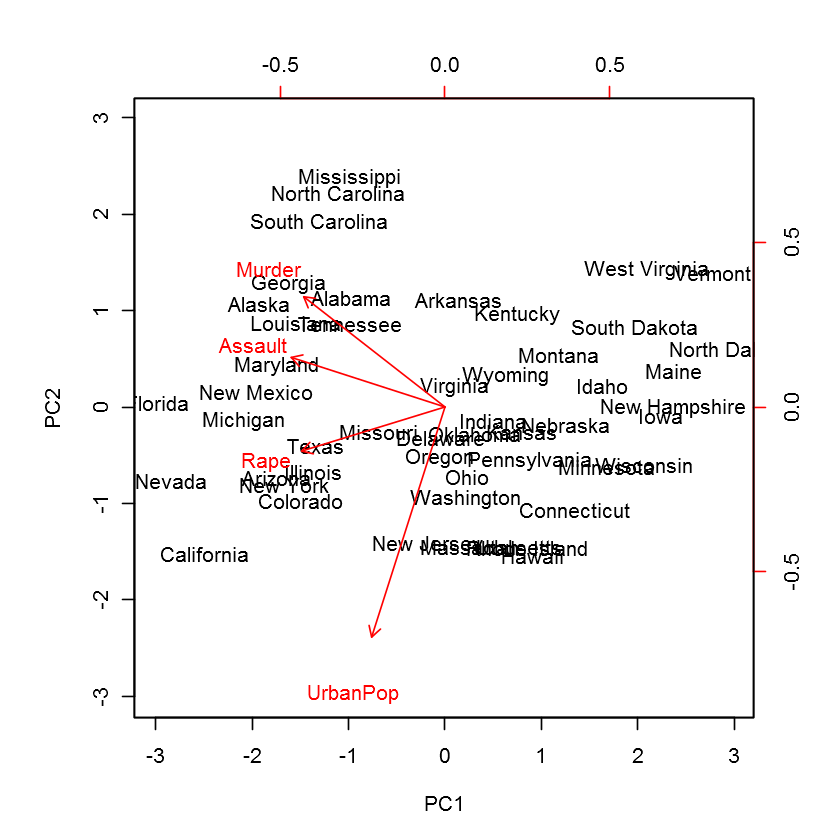

In [42]:
biplot(pr.out, scale=0)

# You can shift the axis with
#pr.out$x=-pr.out$x
#biplot(pr.out, scale=0)

# Proportion of variance explained
pr.var=pr.out$sdev^2
pve=pr.var/sum(pr.var)
pve

# You can visualize the cumulative sum
#plot(pve, xlab="Principal Component", ylab="Proportion of Variance Explained", ylim=c(0,1),type='b')
#plot(cumsum(pve), xlab="Principal Component", ylab="Cumulative Proportion of Variance Explained", ylim=c(0,1),type='b')
#a=c(1,2,8,-3)
#cumsum(a)

# Clustering

## k-means

K-means clustering with 2 clusters of sizes 25, 25

Cluster means:
        [,1]       [,2]
1 -0.1956978 -0.1848774
2  3.3339737 -4.0761910

Clustering vector:
 [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1

Within cluster sum of squares by cluster:
[1] 65.40068 63.20595
 (between_SS / total_SS =  72.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

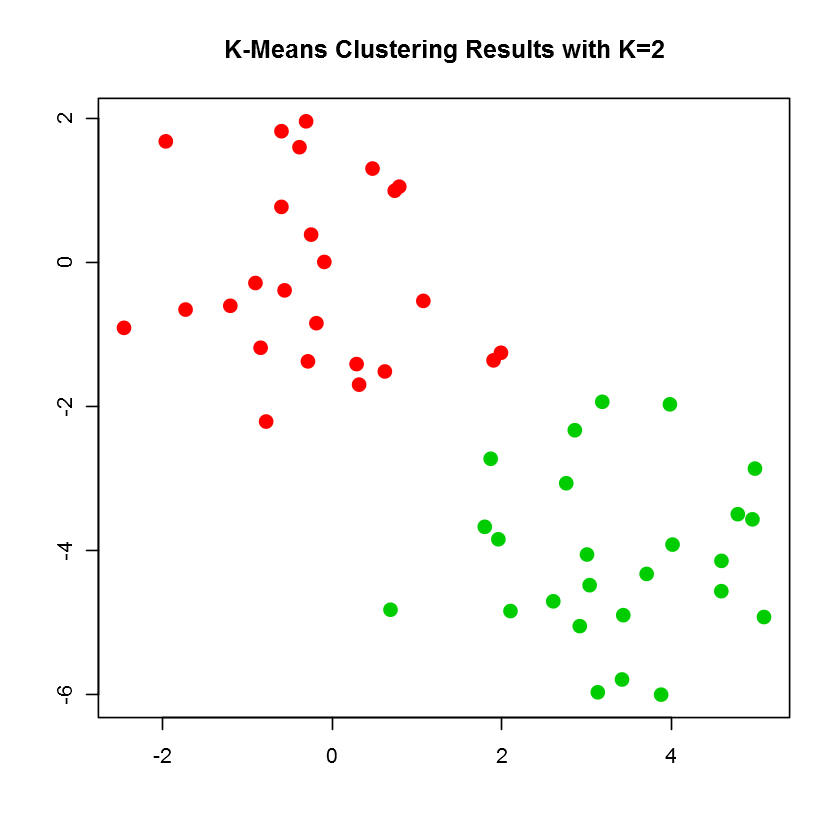

In [16]:
set.seed(2)
x=matrix(rnorm(50*2), ncol=2)
x[1:25,1]=x[1:25,1]+3
x[1:25,2]=x[1:25,2]-4

# Note: 2 clusters was chosen randomly, 3 clusters could work too
km.out=kmeans(x,2,nstart=20)
km.out
plot(x, col=(km.out$cluster+1), 
     main="K-Means Clustering Results with K=2", xlab="", ylab="", pch=20, cex=2)

In [17]:
set.seed(4)
km.out=kmeans(x,3,nstart=20)
# km.out$tot.withinss is the total within-cluster sum of squares,
# which we seek to minimize by performing K-means clustering 
km.out$tot.withinss

#The individual within-cluster sum-of-squares is at
# km.out$withinss

[1] 97.97927

# Hierarchical Clustering

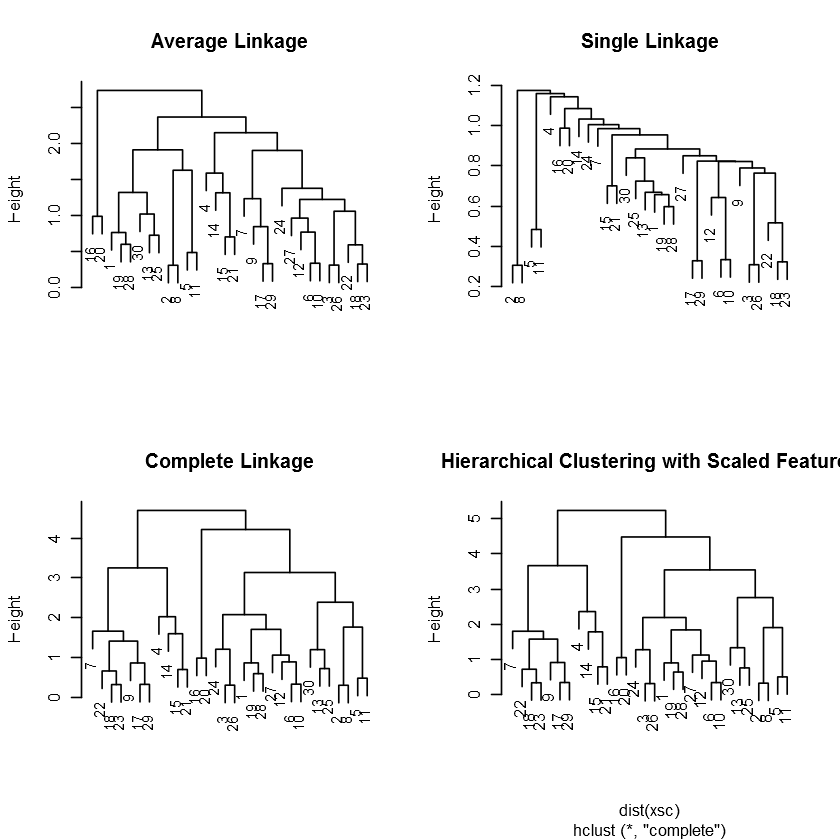

In [24]:
hc.average=hclust(dist(x), method="average")
hc.single=hclust(dist(x), method="single")
hc.complete=hclust(dist(x), method="complete")

par(mfrow=c(2,2))
plot(hc.average, main="Average Linkage", xlab="", sub="", cex=.9)
plot(hc.single, main="Single Linkage", xlab="", sub="", cex=.9)
plot(hc.complete,main="Complete Linkage", xlab="", sub="", cex=.9)

# Scaling the values can create another tree
xsc=scale(x)
plot(hclust(dist(xsc), method="complete"), main="Hierarchical Clustering with Scaled Features")


# You can cut the tree at different level
#cutree(hc.complete, 2)

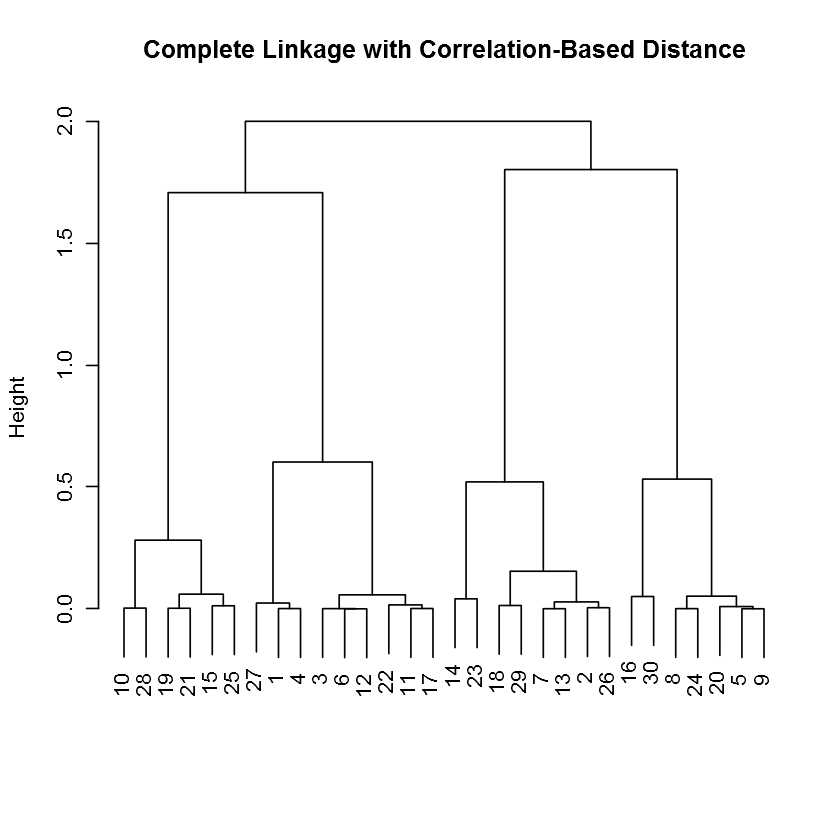

In [25]:
# Hierarchical tree with correlation-based distance
x=matrix(rnorm(30*3), ncol=3)
dd=as.dist(1-cor(t(x)))

plot(hclust(dd, method="complete"), main="Complete Linkage with Correlation-Based Distance", xlab="", sub="")

# NCI60 Data Example

In [26]:
library(ISLR)
nci.labs=NCI60$labs
nci.data=NCI60$data

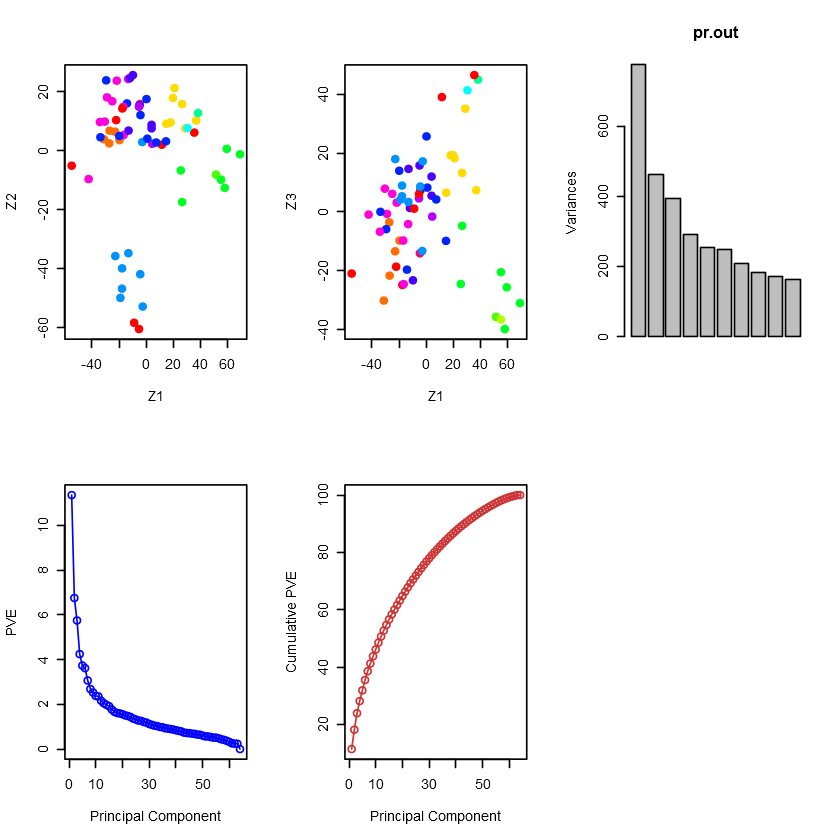

In [39]:
pr.out=prcomp(nci.data, scale=TRUE)
Cols=function(vec){
    cols=rainbow(length(unique(vec)))
    return(cols[as.numeric(as.factor(vec))])
}
par(mfrow=c(2,3))
plot(pr.out$x[,1:2], col=Cols(nci.labs), pch=19,xlab="Z1",ylab="Z2")
plot(pr.out$x[,c(1,3)], col=Cols(nci.labs), pch=19,xlab="Z1",ylab="Z3")

# Variance explained
#summary(pr.out)
plot(pr.out)

# Visualizing the cumulative sum of variance
pve=100*pr.out$sdev^2/sum(pr.out$sdev^2)
plot(pve,  type="o", ylab="PVE", xlab="Principal Component", col="blue")
plot(cumsum(pve), type="o", ylab="Cumulative PVE", xlab="Principal Component", col="brown3")